# Model Two: Enzyme bias
Elvira Mingazova, Raffaele Fronza  
May, 2017  
  
This model improves further the random region generation considering the process of integration sites (IS) retrieval. When using Linear amplification-mediated polymerase chain reaction (LAM-PCR) for identification of the viral vectors, the detection of IS is biased by the presence of a cutting site for the restriction enzyme used nearby.  The purpose of this model is to generate positions/regions linked to the restriction sites for the particular enzyme on the genome of interest and keep only those that are on the mappable parts of the genome. Here the hg38 assembly of the human genome is used. 
#### 1. Make maps of the restriction sites positions on hg38 for the following enzymes: MseI, Tsp509, PstI, AflII

Scan_for_matches on Openstack is used  
Example on MseI
- Create a pattern file containing the recognition sequence for the restriction enzyme
```bash
cat > MseI_pattern.txt
TTAA
```  
ctrl+D to save and exit
- Find the positions of this pattern on the genome
```bash  
scan_for_matches MseI_pattern.txt < hg38.fa
output:
>chr1:[11533,11536]
ttaa
>chr1:[11556,11559]
ttaa
...
```
Different output gives the following command:
```bash
scan_for_matches MseI_pattern.txt < hg38.fa | show hits
output:
chr1:[11533,11536]: ttaa
chr1:[11556,11559]: ttaa
...
```
- Save only the first column under MseI_hg38output.txt

``` bash
scan_for_matches MseI_pattern.txt < ../../../../afzal/testingIndexes/hg38.fa | show_hits | awk '{print $1}' > MseI_hg38output.txt
head MseI_hg38output.txt
chr10:[100000032,100000035]
chr10:[100000061,100000064]
chr10:[100001232,100001235]
chr10:[100001782,100001785]
chr10:[100001876,100001879]
chr10:[100002018,100002021]
chr10:[100002080,100002083]
chr10:[100002134,100002137]
chr10:[100002596,100002599]
chr10:[100002698,100002701]
```


- For each chromosome extract all the starting positions of the restriction sites and write into a separate file
``` bash
declare -a chrom=("chr1" "chr2" "chr3" "chr4" "chr5" "chr6" "chr7" "chr8" "chr9" "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18" "chr19" "chr20" "chr21" "chr22" "chrX" "chrY")
for i in ${chrom[@]}; do awk -F"[" -v chr=$i '$1==chr":" {print $2}' MseI_hg38output.txt | awk -F',' '{print $1}' > MseI_${i}_pos.txt ; done
```

Example file MseI_chr1_pos.txt containing only the starting positions of the restriction sites

In [2]:
!head ../testdata/MseI_chr1_pos.txt

100000132
100000416
100000561
100000636
100000860
100001077
100001311
100001320
100001329
100001428


#### 2. Write the function that generates random positions from the list of the restriction sites, tests whether each one lays inside of the mappable region and outputs only the ones that pass the test (output should contain N positions in total)

In [7]:
import numpy as np
from __future__ import print_function
kmer40={'chr1':0.0788750,'chr2':0.086109,'chr3':0.071728,'chr4':0.068060,'chr5':0.063896,'chr6':0.059406,'chr7':0.053514,'chr8':0.051220,'chr9':0.039697,'chr10':0.046955,'chr11':0.046680,'chr12':0.046712,'chr13':0.035519,'chr14':0.030916,'chr15':0.026443,'chr16':0.025715,'chr17':0.024516,'chr18':0.027496,'chr19':0.017131,'chr20':0.022020,'chr21':0.011919,'chr22':0.011228,'chrX':0.050153,'chrY':0.004092}
kmer100={'chr1':0.079149,'chr2':0.085056,'chr3':0.071048,'chr4':0.067183,'chr5':0.063207,'chr6':0.058915,'chr7':0.053848,'chr8':0.050605,'chr9':0.039585,'chr10':0.046928,'chr11':0.046556,'chr12':0.047077,'chr13':0.034862,'chr14':0.030896,'chr15':0.026539,'chr16':0.026195,'chr17':0.025596,'chr18':0.026942,'chr19':0.019023,'chr20':0.022081,'chr21':0.011808,'chr22':0.011606,'chrX':0.050983,'chrY':0.004312}
kmer200={'chr1':0.079156,'chr2':0.084813,'chr3':0.070927,'chr4':0.067097,'chr5':0.063081,'chr6':0.058819,'chr7':0.053983,'chr8':0.050402,'chr9':0.039582,'chr10':0.046868,'chr11':0.046584,'chr12':0.047115,'chr13':0.034707,'chr14':0.030854,'chr15':0.026544,'chr16':0.026175,'chr17':0.025815,'chr18':0.026807,'chr19':0.019354,'chr20':0.022078,'chr21':0.011794,'chr22':0.011689,'chrX':0.051301,'chrY':0.004455}
def getEnzMatchedIR(inputenzf,inputmappf,chr_name,kmer,N,mapname,enzname,outputf):
    enz = np.sort(np.genfromtxt(inputenzf, dtype=int))
    chr_arr = np.genfromtxt(inputmappf,dtype=None)
    counter = 1
    while counter<=round(N*kmer[chr_name]):
        rand_num = np.random.choice(enz)
        matched_index = np.searchsorted(chr_arr["f0"],rand_num)-1
        if chr_arr["f1"][matched_index] == True:
            with open(outputf, 'a') as f:
                print (chr_name,"\t",rand_num,"\t",rand_num+1,"\t", enzname,"\t",mapname,"\t", "hg38", file=f)
                counter+=1
        else:
            continue

Demonstration of the process

In [5]:
#create the file with the headers
with open('../testdata/MseI_map40_IS100000.txt', 'w') as f:
    print("Chromosome\tStart\tEnd\tMatch\tRnd Model\tAssembly", file=f)

In [8]:
getEnzMatchedIR("../testdata/MseI_chr1_pos.txt", "../testdata/chr1_40_mappableshort.txt","chr1",kmer40,100000,"map_40","MseI",'../testdata/MseI_map40_IS100000.txt')

In [9]:
import pandas as pd

In [12]:
enzmatchedpos = pd.read_csv('../testdata/MseI_map40_IS100000.txt', sep="\t")

In [13]:
enzmatchedpos

,Chromosome,Start,End,Match,Rnd Model,Assembly
0,chr1,85364380,85364381,MseI,map_40,hg38
1,chr1,91532644,91532645,MseI,map_40,hg38
2,chr1,218161117,218161118,MseI,map_40,hg38
3,chr1,223049867,223049868,MseI,map_40,hg38
4,chr1,174190581,174190582,MseI,map_40,hg38
5,chr1,182842457,182842458,MseI,map_40,hg38
6,chr1,40827908,40827909,MseI,map_40,hg38
7,chr1,244656376,244656377,MseI,map_40,hg38
8,chr1,199202451,199202452,MseI,map_40,hg38
9,chr1,214317308,214317309,MseI,map_40,hg38


Then you can continue to append to the file using same function for 23 other chromosomes and come to 100000 positions at the end. This is how it goes with one command (filepaths are relevant for my Openstack working directory: /mnt/big_disc/elvira/genomes/human/enzyme_maps/MseI):

``` python
listofchr = ["chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","chr11","chr12","chr13","chr14","chr15","chr16","chr17","chr18","chr19","chr20","chr21","chr22","chrX","chrY"]

    for chrom in listofchr:
    getEnzMatchedIR('MseI_{0}_pos.txt'.format(chrom),'../../mappability_files/textfiles/map40/{0}_40_mappable.txt'.format(chrom),chrom,kmer40,100000,'map_40','MseI','datasets/MseI_map40_IS100000.txt')
```

#### 3. Plot the distribution of 10000 IS on chr1 matched with MseI

In [15]:
def getEnzMatchedIRSingleChr(inputenzf,inputmappf,chr_name,kmer,N,mapname,enzname,outputf):
    enz = np.sort(np.genfromtxt(inputenzf, dtype=int))
    chr_arr = np.genfromtxt(inputmappf,dtype=None)
    counter = 1
    while counter<=N:
        rand_num = np.random.choice(enz)
        matched_index = np.searchsorted(chr_arr["f0"],rand_num)-1
        if chr_arr["f1"][matched_index] == True:
            with open(outputf, 'a') as f:
                print (chr_name,"\t",rand_num,"\t",rand_num+1,"\t", enzname,"\t",mapname,"\t", "hg38", file=f)
                counter+=1
        else:
            continue


In [14]:
with open('../testdata/MseI_map40_IS100000_chr1.txt', 'w') as f:
    print("Chromosome\tStart\tEnd\tMatch\tRnd Model\tAssembly", file=f)

In [16]:
getEnzMatchedIRSingleChr("../testdata/MseI_chr1_pos.txt", "../testdata/chr1_40_mappableshort.txt","chr1",kmer40,100000,"map_40","MseI",'../testdata/MseI_map40_IS100000_chr1.txt')

In [17]:
enzmatchedpos = pd.read_csv('../testdata/MseI_map40_IS100000_chr1.txt', sep="\t")

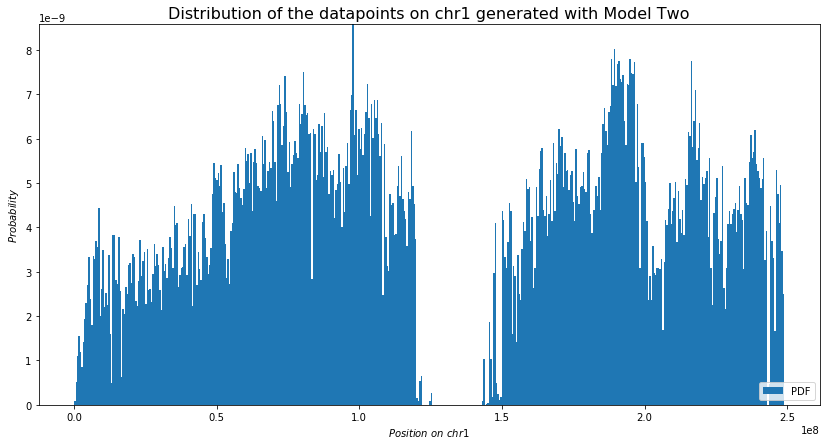

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.hist(enzmatchedpos["Start"],normed=True, label = 'PDF', bins = 500)
plt.xlabel("$Position\ on\ chr1$")
plt.ylabel("$Probability$")
plt.legend(loc='lower right')
plt.title("Distribution of the datapoints on chr1 generated with Model Two", fontsize=16)
plt.savefig("../figures/ModelTwo_100000IS_chr1.pdf")
plt.show()


In [2]:
248956422/500

497912

#### Kolmogorov-Smirnov test for comparing all three models
H0: the two distributions of the random positions come from the same population
H1: there is a significant difference between two distributions hence they are not part of the same population

In [21]:
chr1Len = 248956422
mzero = []
for i in range(100000):
    mzero.append(random.randint(1,chr1Len))

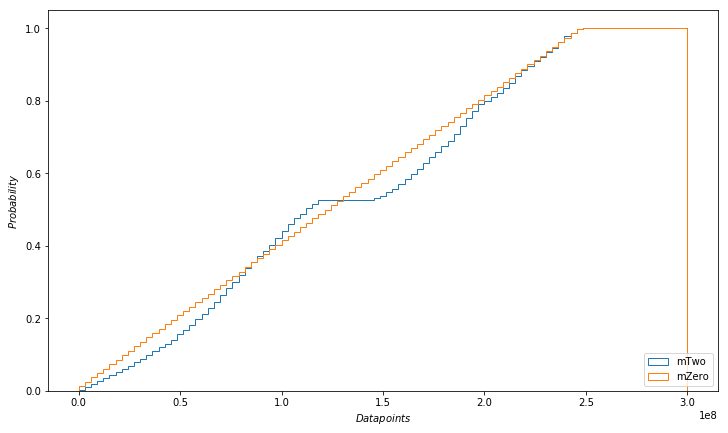

In [29]:
plt.figure(figsize=(12,7))
plt.hist(enzmatchedpos["Start"], normed=True, cumulative=True, histtype="step",label='mTwo', bins=np.linspace(1,300000000,100))
plt.hist(mzero, normed=True, cumulative=True, histtype="step",label='mZero', bins=np.linspace(1,300000000,100))
plt.xlabel("$Datapoints$")
plt.ylabel("$Probability$")
plt.legend(loc='lower right')
plt.show()

In [24]:
from scipy.stats import ks_2samp
ks_2samp(enzmatchedpos["Start"], mzero)

Ks_2sampResult(statistic=0.07621, pvalue=6.2007201491716494e-253)

In [25]:
mone = pd.read_csv('../testdata/map40_IS100000_chr1.txt', sep="\t")

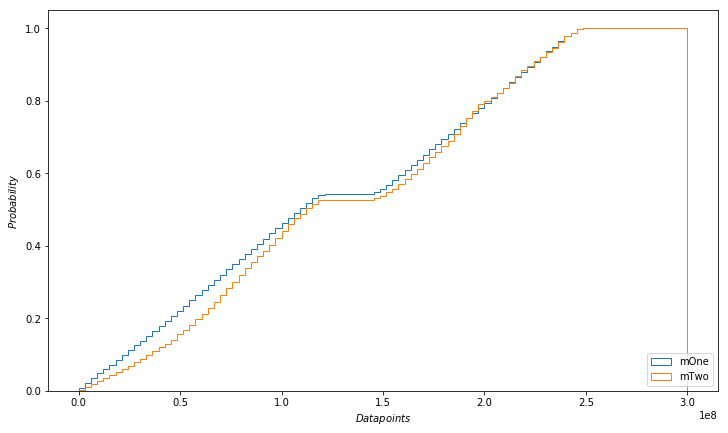

In [30]:
plt.figure(figsize=(12,7))
plt.hist(mone["Start"], normed=True, cumulative=True, histtype="step",label='mOne', bins=np.linspace(1,300000000,100))
plt.hist(enzmatchedpos["Start"], normed=True, cumulative=True, histtype="step",label='mTwo', bins=np.linspace(1,300000000,100))
plt.xlabel("$Datapoints$")
plt.ylabel("$Probability$")
plt.legend(loc='lower right')
plt.show()

In [28]:
from scipy.stats import ks_2samp
ks_2samp(enzmatchedpos["Start"], mone["Start"])

Ks_2sampResult(statistic=0.067980000000000013, pvalue=2.426707647291601e-201)

#### Conclusion
The p-value for both comparisons is much lower than the significance level (pvalue<<0,05) hence we can throw up the zero hypothesis (H0) and accept the H1 stating that the distribution of 100000 positions on chr1 generated by model Zero is differen from model One and Two and that distributions generated with model One and Two are also diffferent compared to each other.